# COVID-19 Global Data Analysis and Visualization

This project explores the global impact of COVID-19 by analyzing data on confirmed cases, deaths, and recoveries. The aim is to identify trends, correlations, and geographic distribution using visualizations. The dataset used in this analysis was sourced from [Novel Corona Virus 2019 Dataset](https://www.kaggle.com/datasets/sudalairajkumar/novel-corona-virus-2019-dataset). 


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
df = pd.read_csv("covid_19_data.csv")

In [3]:
df

SNo ObservationDate     Province/State  Country/Region  \
0            1      01/22/2020              Anhui  Mainland China   
1            2      01/22/2020            Beijing  Mainland China   
2            3      01/22/2020          Chongqing  Mainland China   
3            4      01/22/2020             Fujian  Mainland China   
4            5      01/22/2020              Gansu  Mainland China   
...        ...             ...                ...             ...   
306424  306425      05/29/2021  Zaporizhia Oblast         Ukraine   
306425  306426      05/29/2021            Zeeland     Netherlands   
306426  306427      05/29/2021           Zhejiang  Mainland China   
306427  306428      05/29/2021    Zhytomyr Oblast         Ukraine   
306428  306429      05/29/2021       Zuid-Holland     Netherlands   

                Last Update  Confirmed  Deaths  Recovered  
0           1/22/2020 17:00        1.0     0.0        0.0  
1           1/22/2020 17:00       14.0     0.0        0.0  
2           1/22/2020 17:00        6.0     0.0        0.0  
3           1/22/2020 17:00        1.0     0.0        0.0  
4           1/22/2020 17:00        0.0     0.0        0.0  
...                     ...        ...     ...        ...  
306424  2021-05-30 04:20:55   102641.0  2335.0    95289.0  
306425  2021-05-30 04:20:55    29147.0   245.0        0.0  
306426  2021-05-30 04:20:55     1364.0     1.0     1324.0  
306427  2021-05-30 04:20:55    87550.0  1738.0    83790.0  
306428  2021-05-30 04:20:55   391559.0  4252.0        0.0  

[306429 rows x 8 columns]

In [4]:
# Convert ObservationDate to datetime
df['ObservationDate'] = pd.to_datetime(df['ObservationDate'])


In [5]:
print(df)
df.shape

           SNo ObservationDate     Province/State  Country/Region  \
0            1      2020-01-22              Anhui  Mainland China   
1            2      2020-01-22            Beijing  Mainland China   
2            3      2020-01-22          Chongqing  Mainland China   
3            4      2020-01-22             Fujian  Mainland China   
4            5      2020-01-22              Gansu  Mainland China   
...        ...             ...                ...             ...   
306424  306425      2021-05-29  Zaporizhia Oblast         Ukraine   
306425  306426      2021-05-29            Zeeland     Netherlands   
306426  306427      2021-05-29           Zhejiang  Mainland China   
306427  306428      2021-05-29    Zhytomyr Oblast         Ukraine   
306428  306429      2021-05-29       Zuid-Holland     Netherlands   

                Last Update  Confirmed  Deaths  Recovered  
0           1/22/2020 17:00        1.0     0.0        0.0  
1           1/22/2020 17:00       14.0     0.0     

(306429, 8)

In [6]:
df.columns

Index(['SNo', 'ObservationDate', 'Province/State', 'Country/Region',
       'Last Update', 'Confirmed', 'Deaths', 'Recovered'],
      dtype='object')

In [7]:
df.describe()


SNo                ObservationDate     Confirmed  \
count  306429.000000                         306429  3.064290e+05   
mean   153215.000000  2020-11-06 01:54:54.146441728  8.567091e+04   
min         1.000000            2020-01-22 00:00:00 -3.028440e+05   
25%     76608.000000            2020-07-30 00:00:00  1.042000e+03   
50%    153215.000000            2020-11-10 00:00:00  1.037500e+04   
75%    229822.000000            2021-02-18 00:00:00  5.075200e+04   
max    306429.000000            2021-05-29 00:00:00  5.863138e+06   
std     88458.577156                            NaN  2.775516e+05   

              Deaths     Recovered  
count  306429.000000  3.064290e+05  
mean     2036.403268  5.042029e+04  
min      -178.000000 -8.544050e+05  
25%        13.000000  1.100000e+01  
50%       192.000000  1.751000e+03  
75%      1322.000000  2.027000e+04  
max    112385.000000  6.399531e+06  
std      6410.938048  2.015124e+05

In [8]:
df.isnull().sum()

SNo                    0
ObservationDate        0
Province/State     78103
Country/Region         0
Last Update            0
Confirmed              0
Deaths                 0
Recovered              0
dtype: int64



Droping the "Province/State" column

In [9]:
df_main=df.drop(columns='Province/State')

In [10]:
df_main

SNo ObservationDate  Country/Region          Last Update  \
0            1      2020-01-22  Mainland China      1/22/2020 17:00   
1            2      2020-01-22  Mainland China      1/22/2020 17:00   
2            3      2020-01-22  Mainland China      1/22/2020 17:00   
3            4      2020-01-22  Mainland China      1/22/2020 17:00   
4            5      2020-01-22  Mainland China      1/22/2020 17:00   
...        ...             ...             ...                  ...   
306424  306425      2021-05-29         Ukraine  2021-05-30 04:20:55   
306425  306426      2021-05-29     Netherlands  2021-05-30 04:20:55   
306426  306427      2021-05-29  Mainland China  2021-05-30 04:20:55   
306427  306428      2021-05-29         Ukraine  2021-05-30 04:20:55   
306428  306429      2021-05-29     Netherlands  2021-05-30 04:20:55   

        Confirmed  Deaths  Recovered  
0             1.0     0.0        0.0  
1            14.0     0.0        0.0  
2             6.0     0.0        0.0  
3             1.0     0.0        0.0  
4             0.0     0.0        0.0  
...           ...     ...        ...  
306424   102641.0  2335.0    95289.0  
306425    29147.0   245.0        0.0  
306426     1364.0     1.0     1324.0  
306427    87550.0  1738.0    83790.0  
306428   391559.0  4252.0        0.0  

[306429 rows x 7 columns]

From this we can find that 78103 Columns of the "Province/State" is not filled.

In [11]:
df_main.columns

Index(['SNo', 'ObservationDate', 'Country/Region', 'Last Update', 'Confirmed',
       'Deaths', 'Recovered'],
      dtype='object')

In [12]:
C=df_main['Confirmed'].sum()
C

26252051758.0

In [13]:
Rec=df_main['Recovered'].sum()
Rec

15450237912.0

In [14]:
De=df_main['Deaths'].sum()
De

624013017.0

In [15]:
recovary_rate = Rec/C
recovary_rate

0.5885344907295379

In [16]:
death_rate= De/C
death_rate

0.023770066536221858

#### From "22nd Jan 2020" to "30th May 2021"

The total number of Covid cases were   = 26252051758.0 

The total number of Recovered people were = 15450237912.0 with a recovary rate of= 58.88 %

The total number of Deaths caused were    =  624013017.0  with a death rate of = 2.37 %

In [17]:
countryname=df_main['Country/Region'].unique()
df_main['Country/Region'].unique()


array(['Mainland China', 'Hong Kong', 'Macau', 'Taiwan', 'US', 'Japan',
       'Thailand', 'South Korea', 'China', 'Kiribati', 'Singapore',
       'Philippines', 'Malaysia', 'Vietnam', 'Australia', 'Mexico',
       'Brazil', 'Colombia', 'France', 'Nepal', 'Canada', 'Cambodia',
       'Sri Lanka', 'Ivory Coast', 'Germany', 'Finland',
       'United Arab Emirates', 'India', 'Italy', 'UK', 'Russia', 'Sweden',
       'Spain', 'Belgium', 'Others', 'Egypt', 'Iran', 'Israel', 'Lebanon',
       'Iraq', 'Oman', 'Afghanistan', 'Bahrain', 'Kuwait', 'Austria',
       'Algeria', 'Croatia', 'Switzerland', 'Pakistan', 'Georgia',
       'Greece', 'North Macedonia', 'Norway', 'Romania', 'Denmark',
       'Estonia', 'Netherlands', 'San Marino', ' Azerbaijan', 'Belarus',
       'Iceland', 'Lithuania', 'New Zealand', 'Nigeria', 'North Ireland',
       'Ireland', 'Luxembourg', 'Monaco', 'Qatar', 'Ecuador',
       'Azerbaijan', 'Czech Republic', 'Armenia', 'Dominican Republic',
       'Indonesia', 'Portugal

**Since in this given data both China and Mainland china are written differently we need to replace them with a common name as both are same**

In [18]:
df_main['Country/Region'] = df_main['Country/Region'].replace('Mainland China', 'China')
df_main = df_main.set_index('SNo')


In [19]:
df_main

ObservationDate Country/Region          Last Update  Confirmed  Deaths  \
SNo                                                                             
1           2020-01-22          China      1/22/2020 17:00        1.0     0.0   
2           2020-01-22          China      1/22/2020 17:00       14.0     0.0   
3           2020-01-22          China      1/22/2020 17:00        6.0     0.0   
4           2020-01-22          China      1/22/2020 17:00        1.0     0.0   
5           2020-01-22          China      1/22/2020 17:00        0.0     0.0   
...                ...            ...                  ...        ...     ...   
306425      2021-05-29        Ukraine  2021-05-30 04:20:55   102641.0  2335.0   
306426      2021-05-29    Netherlands  2021-05-30 04:20:55    29147.0   245.0   
306427      2021-05-29          China  2021-05-30 04:20:55     1364.0     1.0   
306428      2021-05-29        Ukraine  2021-05-30 04:20:55    87550.0  1738.0   
306429      2021-05-29    Netherlands  2021-05-30 04:20:55   391559.0  4252.0   

        Recovered  
SNo                
1             0.0  
2             0.0  
3             0.0  
4             0.0  
5             0.0  
...           ...  
306425    95289.0  
306426        0.0  
306427     1324.0  
306428    83790.0  
306429        0.0  

[306429 rows x 6 columns]

In [20]:
Country_cases=df_main.groupby('Country/Region')['Confirmed'].sum()
Country_cases

Country/Region
 Azerbaijan                              1.0
('St. Martin',)                          2.0
Afghanistan                       17026442.0
Albania                           19768869.0
Algeria                           27684358.0
                                     ...    
West Bank and Gaza                41819444.0
Yemen                               962066.0
Zambia                            13493953.0
Zimbabwe                           6484581.0
occupied Palestinian territory          25.0
Name: Confirmed, Length: 228, dtype: float64

In [21]:
Max_country=Country_cases.idxmax()
Max_country_cases=Country_cases.max()
print(f'The country with the most number of confirmed cases is {Max_country} with {Max_country_cases} cases')

The country with the most number of confirmed cases is US with 6049145667.0 cases


In [22]:
Countrydeath_cases=df_main.groupby('Country/Region')['Deaths'].sum()
Maxdeath_country=Countrydeath_cases.idxmax()
Maxdeath_country_cases=Countrydeath_cases.max()
print(f'The country with the most number of death is {Maxdeath_country} with {Maxdeath_country_cases} cases')

The country with the most number of death is US with 123303762.0 cases


In [23]:
china_cases = df_main[df_main['Country/Region'] == 'China']['Confirmed'].sum()
print(f"Total confirmed cases in China: {china_cases}")


Total confirmed cases in China: 40822596.0


**So we can conclude that even though corona started from china ,from "22nd Jan 2020" to "30th May 2021" the confirmed cases were more in US then china**


In [24]:
df_main.columns

Index(['ObservationDate', 'Country/Region', 'Last Update', 'Confirmed',
       'Deaths', 'Recovered'],
      dtype='object')

In [25]:
new_df = df_main.head(2000)

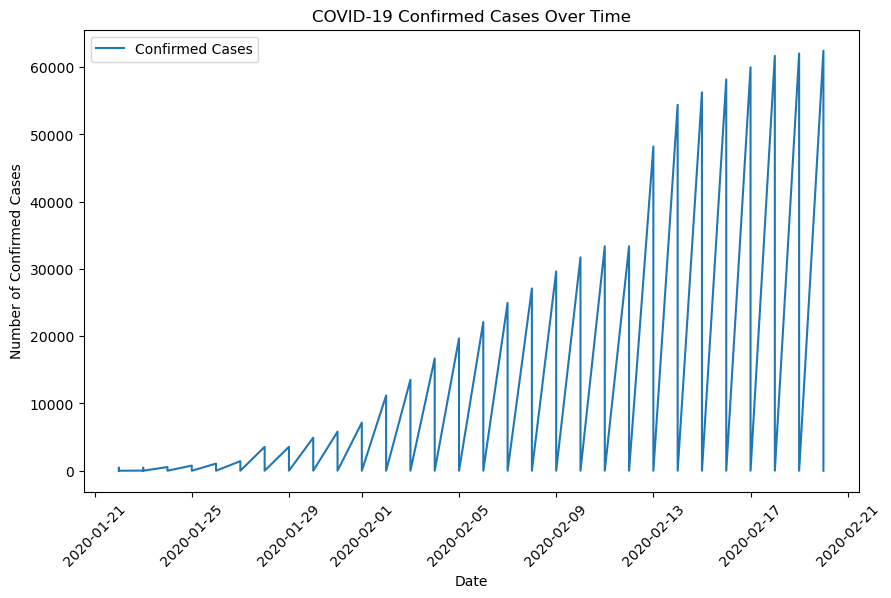

In [26]:
plt.figure(figsize=(10, 6))
plt.plot(new_df['ObservationDate'], new_df['Confirmed'], label='Confirmed Cases')
plt.xlabel('Date')
plt.ylabel('Number of Confirmed Cases')
plt.title('COVID-19 Confirmed Cases Over Time')
plt.xticks(rotation=45)  # Rotate date labels for better readability
plt.legend()
plt.show()


In [27]:
new_df1 = df_main.head(20000)

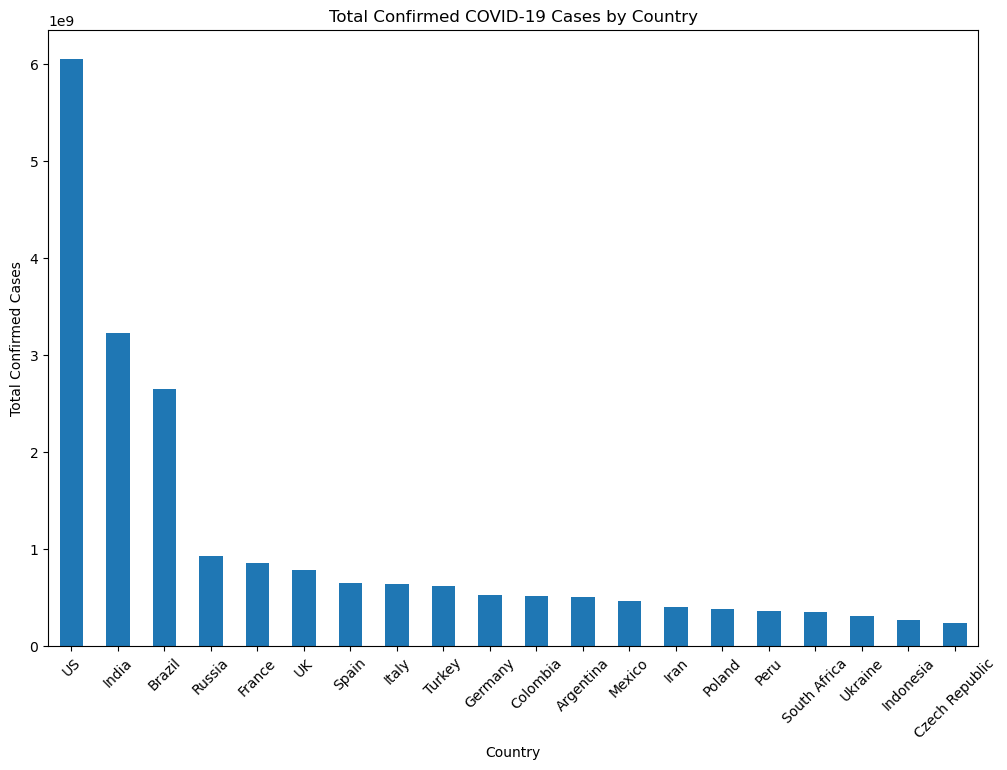

In [28]:
country_cases = df_main.groupby('Country/Region')['Confirmed'].sum().sort_values(ascending=False)

top_20country_cases=country_cases.head(20)

plt.figure(figsize=(12, 8))
top_20country_cases.plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Total Confirmed Cases')
plt.title('Total Confirmed COVID-19 Cases by Country')
plt.xticks(rotation=45)
plt.show()



In [29]:
country_cases = df_main.groupby('Country/Region')['Confirmed'].sum().sort_values(ascending=False)
country_cases.head(60)

Country/Region
US                      6.049146e+09
India                   3.226768e+09
Brazil                  2.653588e+09
Russia                  9.305488e+08
France                  8.551890e+08
UK                      7.837944e+08
Spain                   6.491118e+08
Italy                   6.366943e+08
Turkey                  6.189410e+08
Germany                 5.241668e+08
Colombia                5.153071e+08
Argentina               5.048029e+08
Mexico                  4.604637e+08
Iran                    4.009098e+08
Poland                  3.806808e+08
Peru                    3.611506e+08
South Africa            3.459400e+08
Ukraine                 3.109102e+08
Indonesia               2.651860e+08
Czech Republic          2.378607e+08
Netherlands             2.349560e+08
Chile                   2.324444e+08
Canada                  1.934975e+08
Iraq                    1.873106e+08
Belgium                 1.790099e+08
Romania                 1.730828e+08
Pakistan               

In [30]:
country_cases['China']

40822596.0

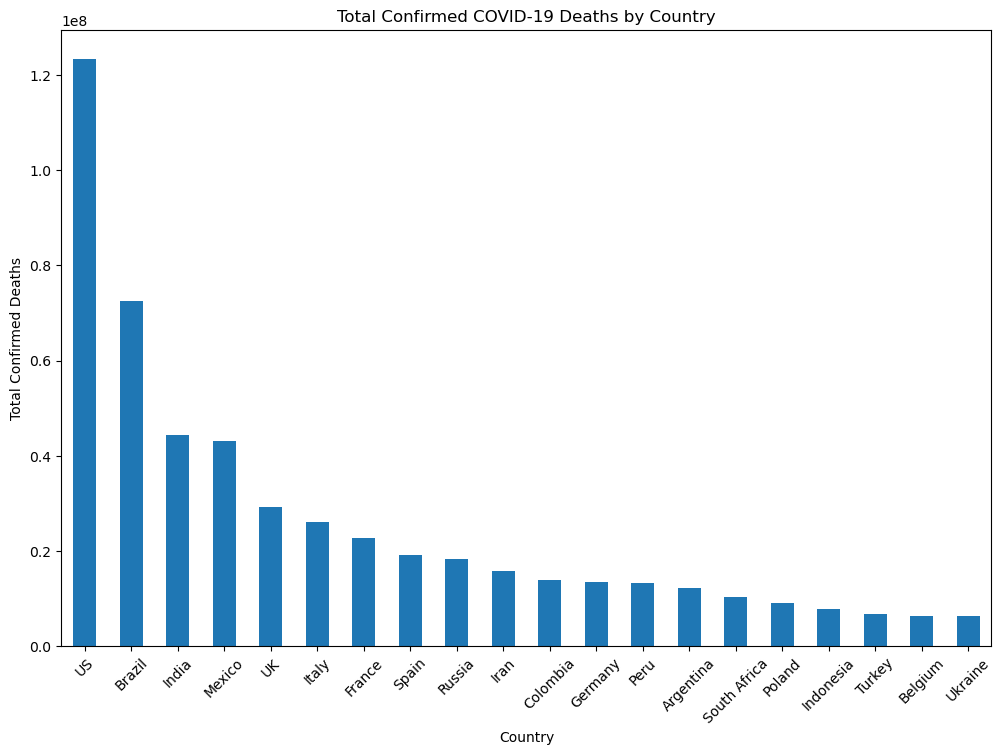

In [31]:
country_deaths = df_main.groupby('Country/Region')['Deaths'].sum().sort_values(ascending=False)
top_20country_deaths=country_deaths.head(20)

plt.figure(figsize=(12, 8))
top_20country_deaths.plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Total Confirmed Deaths')
plt.title('Total Confirmed COVID-19 Deaths by Country')
plt.xticks(rotation=45)
plt.show()

In [32]:
country_deaths = df_main.groupby('Country/Region')['Deaths'].sum().sort_values(ascending=False)
country_deaths.head(20)

Country/Region
US              123303762.0
Brazil           72624610.0
India            44424723.0
Mexico           43005509.0
UK               29171984.0
Italy            26000702.0
France           22720818.0
Spain            19065104.0
Russia           18363719.0
Iran             15744407.0
Colombia         13981703.0
Germany          13364216.0
Peru             13194771.0
Argentina        12112441.0
South Africa     10250036.0
Poland            8951676.0
Indonesia         7770329.0
Turkey            6841158.0
Belgium           6292525.0
Ukraine           6228387.0
Name: Deaths, dtype: float64

<Axes: title={'center': 'Corona Data'}, xlabel='SNo'>

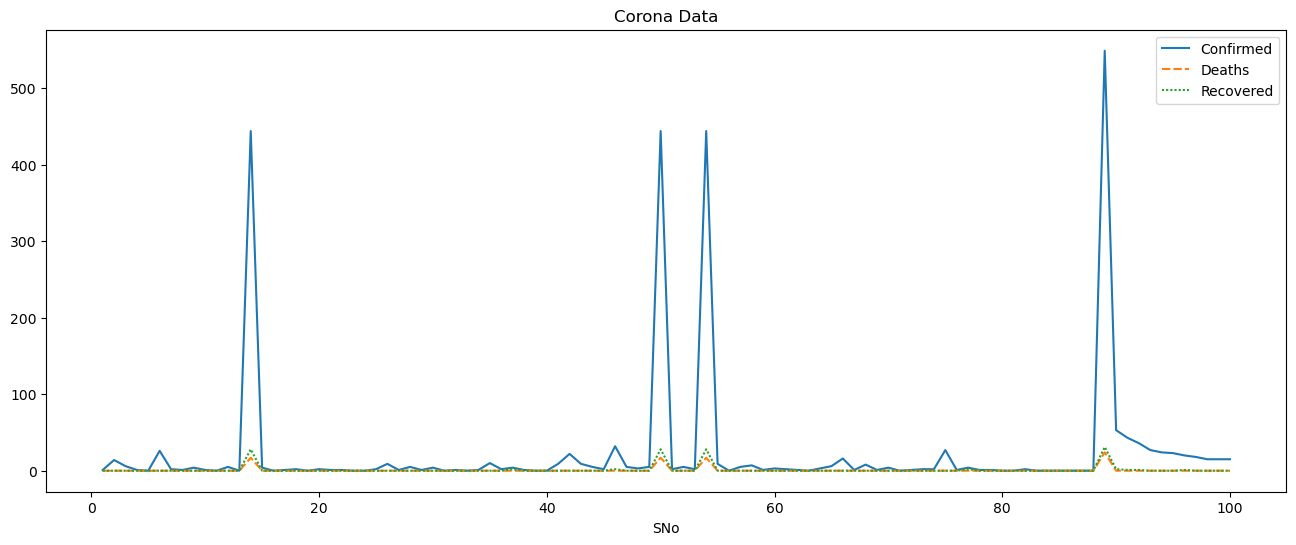

In [33]:
plt.figure(figsize=(16,6))
plt.title("Corona Data")
sns.lineplot(data=df_main.head(100))

<Axes: title={'center': 'Deaths per observation dates'}, xlabel='ObservationDate', ylabel='Deaths'>

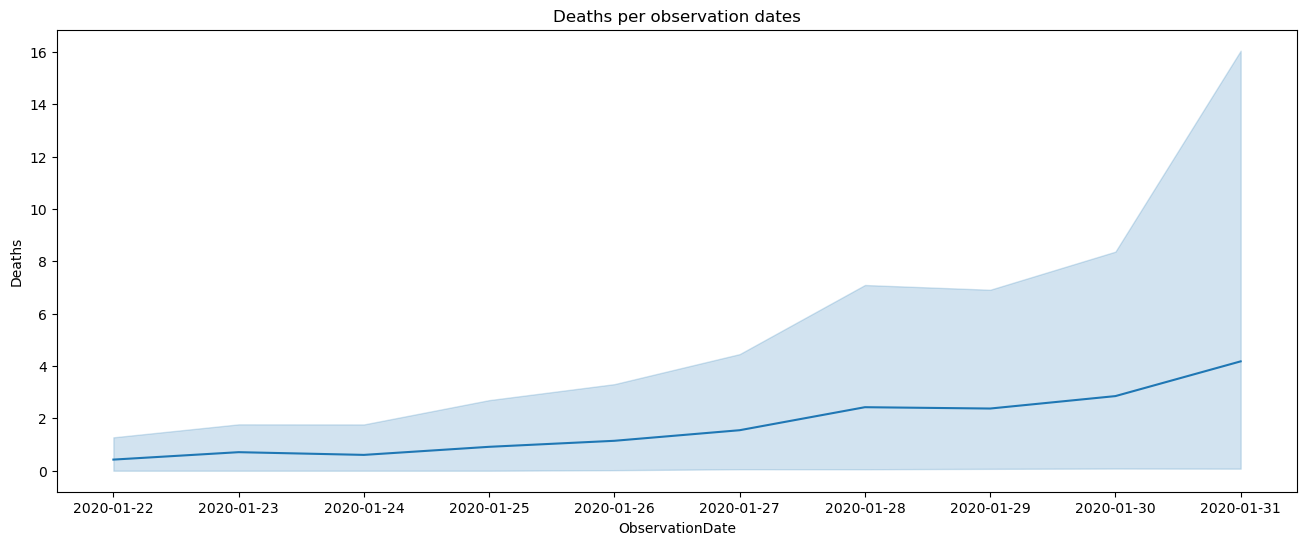

In [34]:
plt.figure(figsize=(16,6))
plt.title("Deaths per observation dates")
sns.lineplot(data=df_main.head(500),x="ObservationDate",y="Deaths")

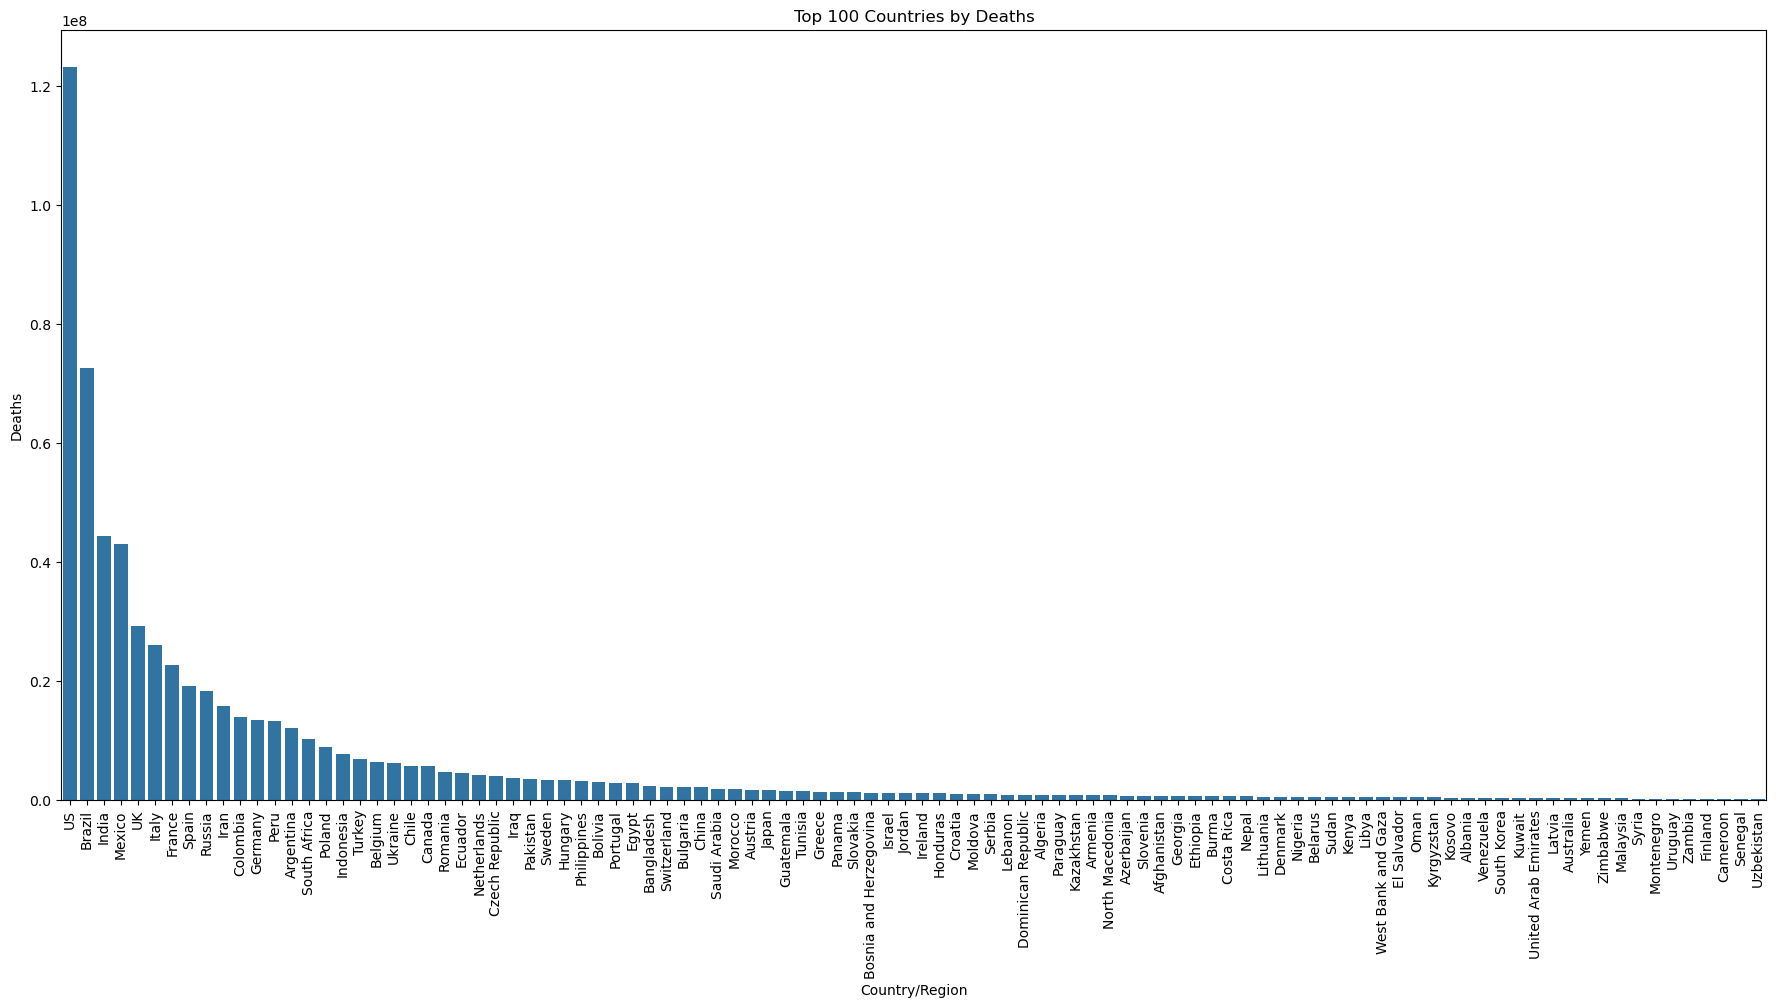

In [35]:
country_deaths = df_main.groupby('Country/Region')['Deaths'].sum().reset_index()
top_100_countries_deaths = country_deaths.sort_values(by='Deaths', ascending=False).head(100)
plt.figure(figsize=(22, 10))
plt.title("Top 100 Countries by Deaths")
sns.barplot(x="Country/Region", y="Deaths", data=top_100_countries_deaths)

plt.ylabel("Deaths")
plt.xticks(rotation=90)
plt.show()

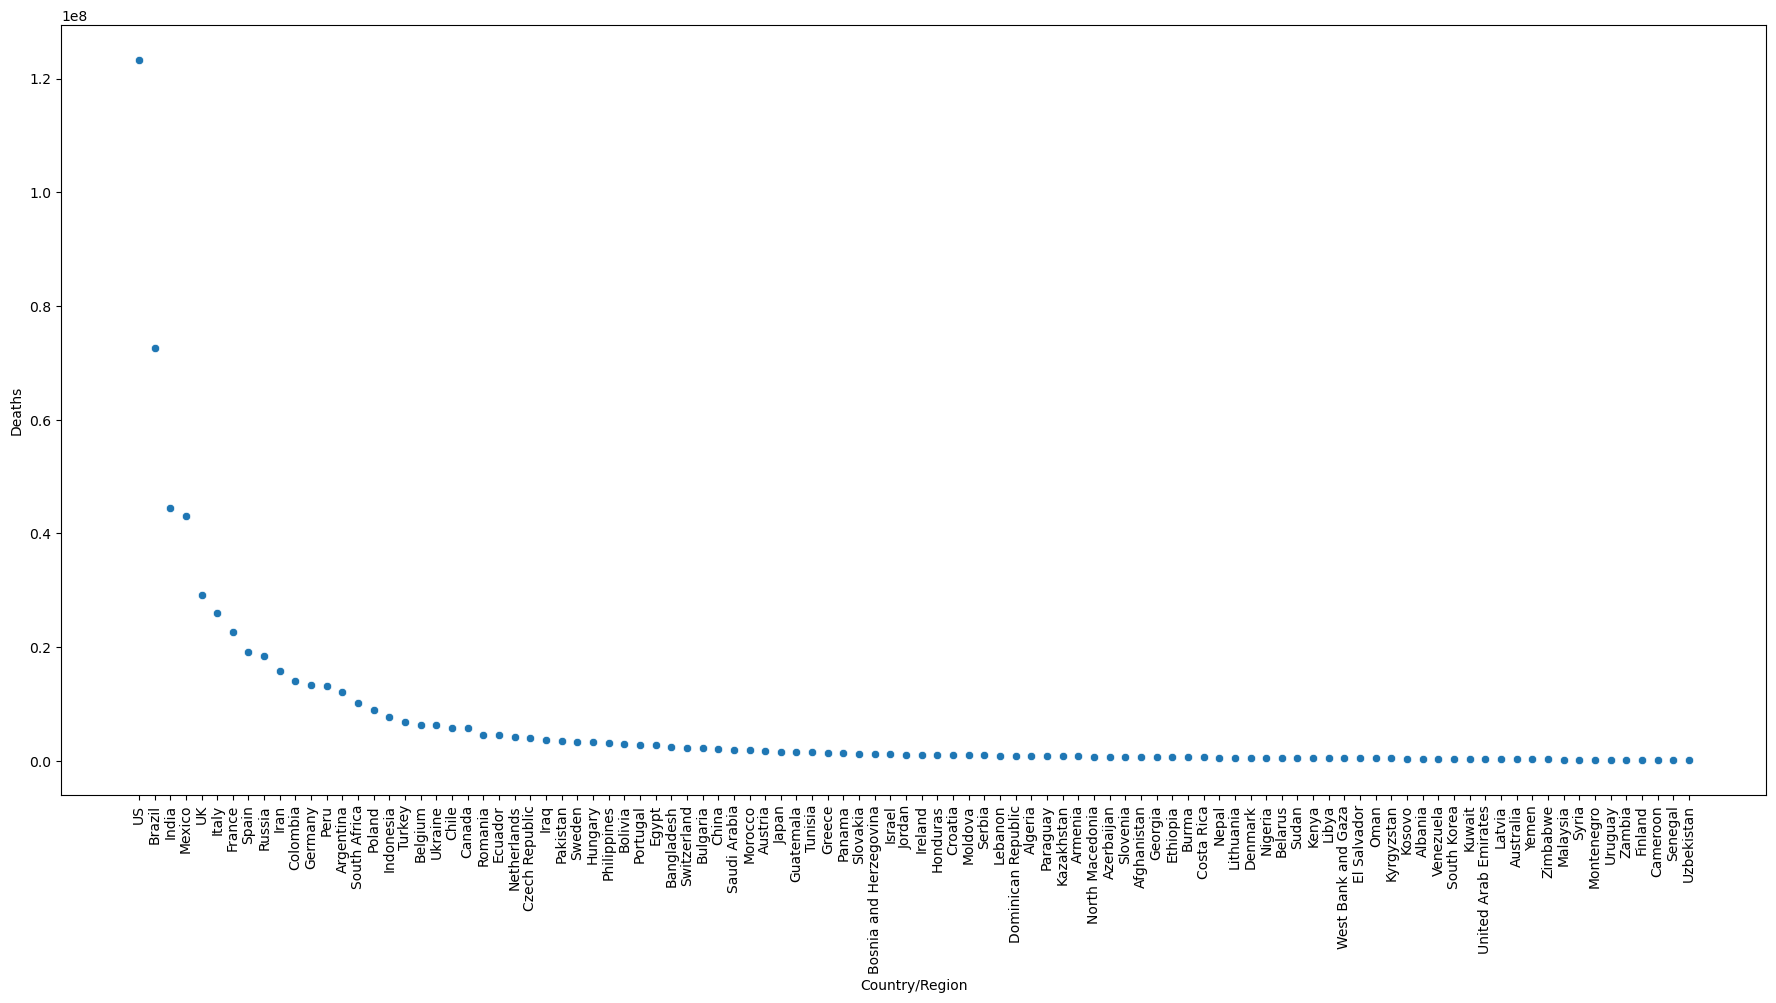

In [36]:
plt.figure(figsize=(22,10))
sns.scatterplot(x="Country/Region",y="Deaths",data=top_100_countries_deaths)
plt.xticks(rotation=90)
plt.show()

In [37]:
df_main

ObservationDate Country/Region          Last Update  Confirmed  Deaths  \
SNo                                                                             
1           2020-01-22          China      1/22/2020 17:00        1.0     0.0   
2           2020-01-22          China      1/22/2020 17:00       14.0     0.0   
3           2020-01-22          China      1/22/2020 17:00        6.0     0.0   
4           2020-01-22          China      1/22/2020 17:00        1.0     0.0   
5           2020-01-22          China      1/22/2020 17:00        0.0     0.0   
...                ...            ...                  ...        ...     ...   
306425      2021-05-29        Ukraine  2021-05-30 04:20:55   102641.0  2335.0   
306426      2021-05-29    Netherlands  2021-05-30 04:20:55    29147.0   245.0   
306427      2021-05-29          China  2021-05-30 04:20:55     1364.0     1.0   
306428      2021-05-29        Ukraine  2021-05-30 04:20:55    87550.0  1738.0   
306429      2021-05-29    Netherlands  2021-05-30 04:20:55   391559.0  4252.0   

        Recovered  
SNo                
1             0.0  
2             0.0  
3             0.0  
4             0.0  
5             0.0  
...           ...  
306425    95289.0  
306426        0.0  
306427     1324.0  
306428    83790.0  
306429        0.0  

[306429 rows x 6 columns]

### Using a choropleth 

In [38]:
fig = px.choropleth(country_cases.reset_index(), locations='Country/Region', locationmode='country names',
                    color='Confirmed', hover_name='Country/Region',
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title='COVID-19 Confirmed cases by Country')
fig.update_geos(showcoastlines=True, coastlinecolor="Black", showland=True, landcolor="LightGray")
fig.update_layout(
    width=1100,  # Width 
    height=800,  # Height
    title_text='COVID-19 confirmed by Countries',  # Title of the plot
    title_x=0.5  # Center the title
)
fig.show()

In [39]:
fig = px.choropleth(top_100_countries_deaths, locations='Country/Region', locationmode='country names',
                    color='Deaths', hover_name='Country/Region',
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title='COVID-19 Deaths by Country')
fig.update_geos(showcoastlines=True, coastlinecolor="Black", showland=True, landcolor="LightGray")
fig.update_layout(
    width=1100,  # Width 
    height=800,  # Height
    title_text='COVID-19 Deaths by Country(only top 100)',  # Title of the plot
    title_x=0.5  # Center the title
)
fig.show()


### Visualize trends over time

In [40]:
fig = px.line(df_main.head(50000), x='ObservationDate', y=['Confirmed', 'Deaths', 'Recovered'],
              labels={'value': 'Number of Cases', 'ObservationDate': 'Date'},
              title='Interactive COVID-19 Trends Over Time')
fig.show()

### Trends in confirmed cases, deaths, and recoveries over time

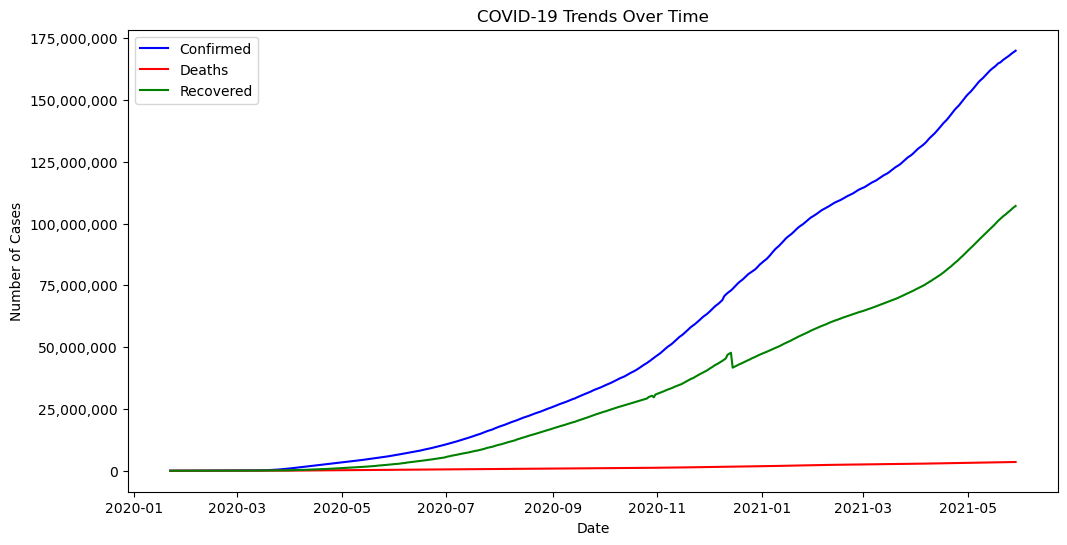

In [41]:
import matplotlib.ticker as mtick
daily_data = df_main.groupby('ObservationDate')[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()
plt.figure(figsize=(12, 6))
plt.plot(daily_data['ObservationDate'], daily_data['Confirmed'], label='Confirmed', color='blue')
plt.plot(daily_data['ObservationDate'], daily_data['Deaths'], label='Deaths', color='red')
plt.plot(daily_data['ObservationDate'], daily_data['Recovered'], label='Recovered', color='green')
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
plt.title('COVID-19 Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend()
plt.show()


## Conclusion

This analysis revealed significant disparities in COVID-19 case distribution across different countries. The correlation between confirmed cases and deaths was high, suggesting a strong relationship between the spread of the virus and its fatal impact.


## Next Steps

Future improvements to this analysis could include:
- Analyzing vaccination data to see its impact on case/death/recovery rates.
- Expanding the dataset to include more demographic variables such as age, gender, etc.
